In [7]:
from tftb.generators import fmlin, sigmerge, noisecg
from tftb.processing.cohen import WignerVilleDistribution
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# ----------------------------------------------------------------------------
#                        LINEAR FREQUENCY MODULATION
# ----------------------------------------------------------------------------

# generate a chirp signal
n_points = 128
fmin, fmax = 0.0, 0.5
signal, _ = fmlin(n_points, fmin, fmax)
# noisy chirp
# signal = sigmerge(signal, noisecg(128), 0)

# compute the energy spectrum of the chirp
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)



(array([[1.        , 2.99755283, 4.95118229, ..., 4.95118229, 2.99755283,
         1.        ],
        [1.        , 2.99999985, 4.98757845, ..., 4.89110636, 2.99029353,
         1.        ],
        [1.        , 2.99762869, 4.99999701, ..., 4.80784191, 2.97823945,
         1.        ],
        ...,
        [1.        , 2.9614196 , 4.70206907, ..., 4.98833633, 2.99044507,
         1.        ],
        [1.        , 2.97823945, 4.80784191, ..., 4.99999701, 2.99762869,
         1.        ],
        [1.        , 2.99029353, 4.89110636, ..., 4.98757845, 2.99999985,
         1.        ]]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  

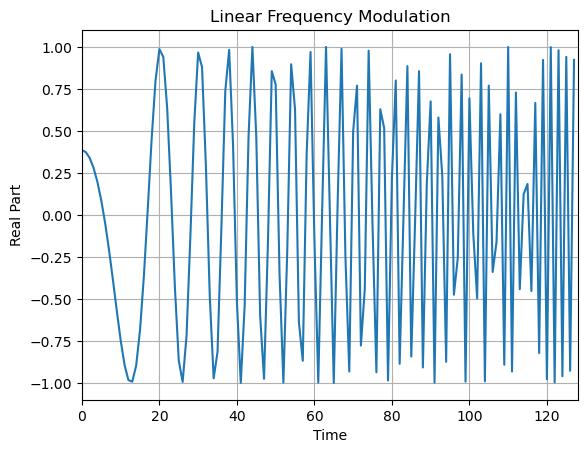

In [6]:
# ----------------------------------------------------------------------------
#                                   PLOTS
# ----------------------------------------------------------------------------

plt.figure()
# plt.subplot(2, 1, 1)
plt.plot(np.real(signal))
plt.xlim(0, n_points)
plt.title('Linear Frequency Modulation')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()


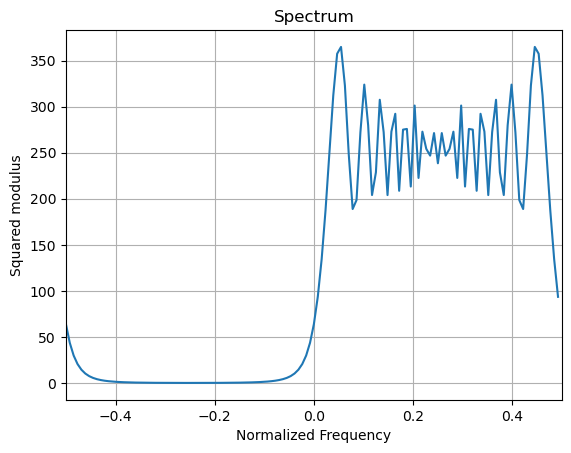

In [8]:
plt.figure()
# plt.subplot(2, 1, 2)
plt.plot(np.arange(-64, 64, dtype=float) / 128.0, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()



In [9]:
# compute Wigner-Ville distribution of the chirp.
wvd = WignerVilleDistribution(signal)
wvd.run()

wvd.plot(kind='contour', extent=[0, n_points, fmin, fmax])

plt.show()